# Workshop #6: Hypothesis Tests

In [1]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Problem 1
*Gulf Real Estate Properties Inc.* is a real estate firm located in southwest Florida. The company, which advertises itself as “expert in the real estate market,” monitors condominium sales by collecting data on location, list price, sale price, and number of days it takes to sell each unit. Each condominium is classified as *Yes* for Gulf view if it is located directly on the Gulf of Mexico or *No* for Gulf view if it is located on the bay or a golf course, near but not on the Gulf. Sample data from the Multiple Listing Service in Naples, Florida, provided recent sales data for some condominiums. The prices are in thousands of dollars. The data are given in `condominiums.csv`.

Construct a 95% confidence interval estimate of the population mean *Sale Price* for condominiums **with Gulf view**, and then the 95% confidence interval for the population mean *Sale Price* for condominiums **without Gulf view**. Based on your results, does it seem that the prices differ?

In [19]:
condominiums = pd.read_csv('condominiums.csv')
display(condominiums.head())
condominiums.size


,gulf_view,list_price,sale_price,days_to_sell
0,yes,495.0,475.0,130
1,yes,379.0,350.0,71
2,yes,529.0,519.0,85
3,yes,552.5,534.5,95
4,yes,334.9,334.9,119


232

In [20]:
with_Gulf_view = condominiums[condominiums['gulf_view'] == 'yes']
without_Gulf_view = condominiums[condominiums['gulf_view'] == 'no']

display(with_Gulf_view.size)
display(without_Gulf_view.size)

160

72

In [25]:
# Sale price for with_Gulf_view

df_yes = len(with_Gulf_view) - 1 

print('mean with Gulf view = ', np.mean(with_Gulf_view['sale_price']))
print('stdev with Gulf view = ', np.std(with_Gulf_view['sale_price'], ddof=1))
se = np.std(with_Gulf_view['sale_price'], ddof=1)/np.sqrt(df_yes)

L = np.mean(with_Gulf_view['sale_price']) - 2*se
U = np.mean(with_Gulf_view['sale_price']) + 2*se

print(f'We are 95% confident that the mean sale price for condominums with Gulf view is between ${round(L,1)}k and ${round(U,1)}k')


mean with Gulf view =  454.2225
stdev with Gulf view =  192.5177534104456
We are 95% confident that the mean sale price for condominums with Gulf view is between $392.6k and $515.9k


In [26]:
# Sale price for without_Gulf_view

df_no = len(without_Gulf_view) - 1 

print('mean without Gulf view = ', np.mean(without_Gulf_view['sale_price']))
print('stdev without Gulf view = ', np.std(without_Gulf_view['sale_price'], ddof=1))
se = np.std(without_Gulf_view['sale_price'], ddof=1)/np.sqrt(df_no)

L = np.mean(without_Gulf_view['sale_price']) - 2*se
U = np.mean(without_Gulf_view['sale_price']) + 2*se

print(f'We are 95% confident that the mean sale price for condominums with Gulf view is between ${round(L,1)}k and ${round(U,1)}k')

mean without Gulf view =  203.1888888888889
stdev without Gulf view =  43.89172357851547
We are 95% confident that the mean sale price for condominums with Gulf view is between $181.9k and $224.5k


## Problem 2
Triphammer Road is a busy street that passes through a residential neighborhood. Residents there are concerned that vehicles traveling on Triphammer *often **exceed** the posted speed* limit of 30 miles per hour. The local police sometimes place a radar speed detector by the side of the road; as a vehicle approaches, this detector displays the vehicle’s speed to its driver. The local residents are not convinced that such a passive method is helping the problem. They wish to persuade the village to add extra police patrols to encourage drivers to observe the speed limit. To help their case, a resident stood where he could see the detector and recorded the speed of vehicles passing it during a 15-minute period one day. When clusters of vehicles went by, he noted only the speed of the front vehicle. The data are given in `triphammer.csv`.

Is there sufficient evidence to support the residents' concern about the speed of vehicles passing on Triphammer Road? State the hypotheses of the test, and then perform the correct test to reach a conclusion.


,vehicle type,speed (mph)
0,car,29
1,SUV,34
2,truck,34
3,truck,28
4,truck,30


mean =  31.043478260869566
stdev =  4.247761558853035
s.e.=  0.8857195124984071


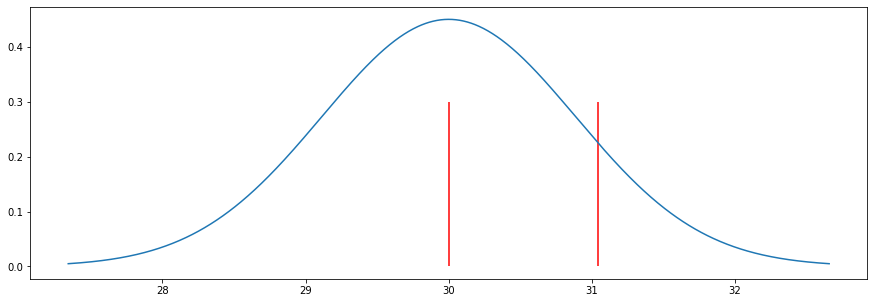

0.12566910367402262

Do not reject the H0. There is no evidence that the average speed is greater than 30 mph


In [23]:
# Hypothesis:
# HO: mu = 30 miles per hour
# Ha: mu > 30 miles per hour

mu0 = 30

triphammer = pd.read_csv('triphammer.csv')
display(triphammer.head())
triphammer.size

data = np.array(triphammer['speed (mph)'])
data

n = data.size
mean = np.mean(data)
stdev = np.std(data, ddof=1)
se = stdev/np.sqrt(n)
df = n -1 

print('mean = ', mean)
print('stdev = ', stdev)
print('s.e.= ', se)

T =stats.norm(mu0,se)
xs = np.linspace(mu0 - 3*se, mu0 + 3*se, 1000)

plt.figure(figsize=(15,5))
plt.plot(xs, T.pdf(xs))
plt.vlines([mu0, mean], 0,0.3, colors='r' )
plt.show()

display(stats.ttest_1samp(data, mu0, alternative='greater').pvalue)

print('Do not reject the H0. There is no evidence that the average speed is greater than 30 mph')

## Problem 3
In an investigation of environmental causes of disease, data were collected on the annual mortality rate (deaths per 100,000) for males in 61 large towns in England and Wales. In addition, the water hardness was recorded as the calcium concentration (parts per million, ppm) in the drinking water. The data set (given in `mortality_rates.csv`) also notes, for each town, whether it was south or north of Derby.

Perform an appropriate hypothesis test to establish if there is a significant **difference in mortality rates** in the two regions?

In [47]:
mortality_rates = pd.read_csv('mortality_rates.csv')
display(mortality_rates.head())
mortality_rates.shape

,derby,mortality,calcium
0,South,1702,44
1,South,1309,59
2,South,1259,133
3,North,1427,27
4,North,1724,6


(61, 3)

<AxesSubplot:xlabel='derby', ylabel='mortality'>

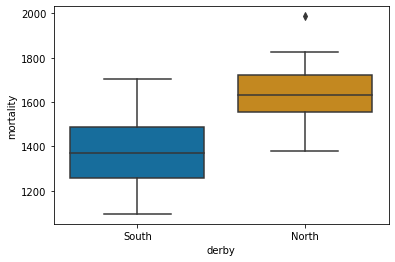

In [48]:
import seaborn as sns
sns.boxplot(y='mortality', x='derby',
            data=mortality_rates,
            palette='colorblind')

In [49]:
south = np.array(mortality_rates[mortality_rates['derby']=='South']['mortality'])
north = np.array(mortality_rates[mortality_rates['derby']=='North']['mortality'])

#H0: mu_1 = mu_2
#Ha: mu_1 =/= mu_2
data = np.array(mortality_rates['mortality'])
print('mean_1 =', np.mean(south))
print('mean_2 =', np.mean(north))
results_ind = stats.ttest_ind(south, north, equal_var=True, alternative='two-sided')
print('p-value = ',results_ind.pvalue)

print('Reject the HO. There is evidence that the average mortality rates are different in the two derbies.')

mean_1 = 1388.851851851852
mean_2 = 1631.5882352941176
p-value =  1.6733802433602796e-08
Reject the HO. There is evidence that the average mortality rates are different in the two derbies.


In [50]:
mean = np.mean(mortality_rates['mortality'])
std = np.std(mortality_rates['mortality'], ddof=1)
# std_south=np.std(south, ddof=1)
# std_north=np.std(north, ddof=1)
std

187.66875393145708

In [51]:
mean_south = np.mean(south)
mean_north = np.mean(north)

std_south = np.std(south)
std_north = np.std(north)

In [52]:
mortality_rates ['Outlier'] = ((mortality_rates['mortality'] < np.mean(south) - 3*std_south) | (mortality_rates['mortality'] > np.mean(south) + 3*std_south))

In [53]:
mortality_rates_without_outliers = mortality_rates[mortality_rates['Outlier']==False]

In [55]:
mortality_rates_without_outliers.head(20)

,derby,mortality,calcium,Outlier
0,South,1702,44,False
1,South,1309,59,False
2,South,1259,133,False
3,North,1427,27,False
4,North,1724,6,False
5,South,1175,107,False
6,South,1486,5,False
7,South,1456,90,False
8,North,1696,6,False
9,South,1236,101,False


In [56]:
south_without_outliers = np.array(mortality_rates_without_outliers[mortality_rates_without_outliers['derby']=='South']['mortality'][mortality_rates_without_outliers['Outlier']==False])
north_without_outliers = np.array(mortality_rates_without_outliers[mortality_rates_without_outliers['derby']=='North']['mortality'][mortality_rates_without_outliers['Outlier']==False])

#H0: mu_1 = mu_2
#Ha: mu_1 =/= mu_2
data = np.array(mortality_rates_without_outliers['mortality'])
print('mean_1 =', np.mean(south_without_outliers))
print('mean_2 =', np.mean(north_without_outliers))
results_ind = stats.ttest_ind(south_without_outliers, north_without_outliers, equal_var=True, alternative='two-sided')
print('p-value = ',results_ind.pvalue)

print('Reject the HO. There is evidence that the average mortality rates are different in the two derbies.')

mean_1 = 1388.851851851852
mean_2 = 1620.8181818181818
p-value =  2.0021068045086088e-08
Reject the HO. There is evidence that the average mortality rates are different in the two derbies.


<AxesSubplot:xlabel='derby', ylabel='mortality'>

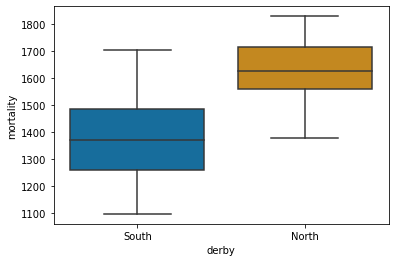

In [57]:
import seaborn as sns
sns.boxplot(y='mortality', x='derby',
            data=mortality_rates_without_outliers,
            palette='colorblind')

## Problem 4
A hygiene scientist decided to investigate just how effective washing with soap is in eliminating bacteria. To do this she tested four different methods—washing with water only, washing with regular soap, washing with antibacterial soap (ABS), and spraying hands with antibacterial spray (AS) (containing 65% ethanol as an active ingredient). She suspected that the number of bacteria on her hands before washing might vary considerably from day to day. To help even out the effects of those changes, she generated random numbers to determine the order of the four treatments. Each morning she washed her hands according to the treatment randomly chosen. Then she placed her right hand on a sterile media plate designed to encourage bacteria growth. She incubated each plate for 2 days at 36 °C after which she counted the bacteria colonies. She replicated this procedure 8 times for each of the four treatments. The data are given in `bacterial_counts.csv`.

Is there evidence that the average bacterial counts are different for the four methods she tested?

In [26]:
bacterial_counts = pd.read_csv('bacterial_counts.csv')
display(bacterial_counts.head())
bacterial_counts.size

,method,bacterial_count
0,water,74
1,soap,84
2,antibacterial soap,70
3,alcohol spray,51
4,water,135


64

In [28]:
water = bacterial_counts[(bacterial_counts['method'] == 'water')]
soap = bacterial_counts[(bacterial_counts['method'] == 'soap')]
antibacterial_soap = bacterial_counts[(bacterial_counts['method'] == 'antibacterial soap')]
alcohol_spray = bacterial_counts[(bacterial_counts['method'] == 'alcohol spray')]

In [31]:
array_water = np.array(water['bacterial_count'])
array_soap = np.array(soap['bacterial_count'])
array_antibacterial_soap = np.array(antibacterial_soap['bacterial_count'])
array_alcohol_spray = np.array(alcohol_spray['bacterial_count'])

In [33]:
df = pd.DataFrame({'method' : np.concatenate([array_water, array_soap, array_antibacterial_soap, array_alcohol_spray]),
                                'bacterial_count' : np.repeat(['water', 'soap', 'antibacterial soap', 'alcohol spray'], repeats=8)})
display(df)

,method,bacterial_count
0,74,water
1,135,water
2,102,water
3,124,water
4,105,water
5,139,water
6,170,water
7,87,water
8,84,soap
9,51,soap


In [34]:
# perform Tukey's HSD (Honestly Significant Difference) test
tukey = pairwise_tukeyhsd(endog=df['method'],
                          groups=df['bacterial_count'],
                          alpha=0.05)

# display results
print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1             group2       meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------
     alcohol spray antibacterial soap     55.0  0.032   3.7359 106.2641   True
     alcohol spray               soap     68.5 0.0056  17.2359 119.7641   True
     alcohol spray              water     79.5 0.0012  28.2359 130.7641   True
antibacterial soap               soap     13.5 0.8836 -37.7641  64.7641  False
antibacterial soap              water     24.5 0.5612 -26.7641  75.7641  False
              soap              water     11.0    0.9 -40.2641  62.2641  False
------------------------------------------------------------------------------


In [35]:
print('Group 1: water, soap, antibacterial soap')
print('Group 2: alcohol spray')

Group 1: water, soap, antibacterial soap
Group 2: alcohol spray


## Problem 5
In July 1991, and again in April 2001, the *Gallup Poll* asked random samples of adults about their opinions on working parents. The given in `working_parents.csv` contains responses to the question "Considering the needs of both parents and children, which of the following do you see as the ideal family in today’s society?"

Based on these data, is there evidence that there was a change in people’s attitudes during the 10 years between these polls? (in other words, are the responses in 1991 and 2001 independent)

In [37]:
df_working_parents = pd.read_csv('working_parents.csv')
display(df_working_parents.head())
df_working_parents.shape

,ideal_arrangement,year
0,both_work_full_time,1991
1,both_work_full_time,1991
2,both_work_full_time,1991
3,both_work_full_time,1991
4,both_work_full_time,1991


(2030, 2)

In [41]:
# Ho:Change of people's attitude during the 10 years
# Ha:People's attitude has NOT been changed during the 10 years

obs_data = pd.crosstab(df_working_parents['ideal_arrangement'], df_working_parents['year'])
display(obs_data)

chi_sq, p_value, df, exp_data =stats.chi2_contingency(obs_data)
print('chi_sq', chi_sq)
print('p-value =', p_value)
print('df =', df)
print('expected data: \n', exp_data)

print('Based on the data, there is NO evidence that has been a change of attitude during the 10 years!')

year,1991,2001
ideal_arrangement,,
both_work_full_time,142,131
no_opinion,51,51
"one_works,other_stays_home_for_kids",396,416
"one_works,other_works_at_home",152,173
"one_works_full_time,other_part_time",274,244


chi_sq 4.030209095036681
p-value = 0.4019329311784825
df = 4
expected data: 
 [[136.5 136.5]
 [ 51.   51. ]
 [406.  406. ]
 [162.5 162.5]
 [259.  259. ]]
Based on the data, there is NO evidence that has been a change of attitude during the 10 years!
